# Project 4 Project
## Recommendations of Movies
![First Picture](pictures/Movie.jpg)

## Overview 
There are more than millions of movies made since first introduced. The normal person however has limited time to watch movies in their free time more than ever. **To help consumers save time and money and companies give consumers the best experience**, recommendations are made to make selection easier. To make these recommendations, we will be using a dataset of roughly **10,000 movie entries** to predict that a user would rate a given movie higher than those users with similar reviews on said movie. By comparing similar users and movie ratings, we should be able to recommend movies accurately. 

We attempt to use **memory-based modeling** and **model-based modeling** to fit the training set. **Peterson's similarity** appeared to perform the best for the Memory based models and was used to compare the others. Grid search was also used for both types to find the best combinations for each of the models. The final model used was the KNN Baseline algorithm

Lastly, there were **two ways** to recommend to users the top 5 movies. <br>
**First** was an artificial ranking given by the position and weighing them the user-based model and the item-based model. **The sum of the two ranks is their combined rank and is compared to the others to recommend.** <br>
The **second** way is to take the corresponding rank of the predicted values from the models and take **the average of the ratings from their sum**. The second way appear to be a better prediction than the previous models with a small difference in RSME. 

## Buiness Understanding
There has been a boom in streaming services and thousands of movies for consumers to watch. Netflix has over **4,000 movies** and Prime Video has roughly **7,000 movies** not considering that these big streaming services have their original movies as well. To compete with other streaming platforms, the user experience should be the focus of these companies. <br>

**One aspect to look into is the recommendation system they have on their website that would recommend movies to the users based on their movies, trending movies, and popular movies**. The user experience needs to entice old users to stay and welcome new users to join and begin watching movies. 

Recommendation works well in most cases. On average, better-rated movies perform well and people will actively look for them before making their choice to watch said movie. For example, **70% of videos** watched are made from their recommendations. 

## Data Understanding
The dataset was compiled by the **Grouplens** research group and the source of that data comes from [MovieLens](https://movielens.org/). MovieLens is a movie recommendation service that has **9,742 movies** and **100,836 ratings** from **610 users**. The dataset was updated on September 26, 2018. There are three datasets but will only be needing two of them, the ratings and the movies. 

The movie dataset has the **movie IDs, titles, and genres** for the movie. This was used mainly for conversions but could potentially be used for the genres as it was explored for a bit. 
Ratings dataset have the most pieces of information as it has ratings and timestamps. The ratings were scaled from **0 to 5 with a .5 step**. 

Exploring the datasets have some interesting facts concerning the dataset. For one, the distribution is slightly skewed left with the **mean** rating happening to be roughly **3.5**. There are a handful of users that contributes to the reviews given which may have bias depending on who the user was. **Most movies were not rated below 3** so it might be difficult to determine a good movie to recommend.  

In [1]:
### Read all the dataset and load them in with proper names ###
### Links were not used for this project ###

import pandas as pd
import helper as hp
movies = pd.read_csv('Data/movies.csv')
ratings = pd.read_csv('Data/ratings.csv')
tags = pd.read_csv('Data/tags.csv')

# links = pd.read_csv('ml-latest-small/links.csv') 

### Exploration Information
* There are **9,742** movies in the dataset
* There are **100,836** ratings and 610 users 
* There are **58** users that make up the **3,683** tags added
* Genres are separated by | if there are more than one


In [2]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [3]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


## Data Preperations
Timestamp was not needed for this project and so it was removed from the rating data frame. <br>
Genre will be used to compare so I made all the letters lowercase to standardize the words when comparing. <br>
Lastly, a training and test set was set up to test the accuracy of the model when performing the predictions. 

In [4]:
### Remove the timestamp column ### 
ratings.drop('timestamp', axis = 1, inplace = True)
movies['genres'] = movies['genres'].apply(lambda x: x.lower())

In [5]:
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split

### Reader to use surprise libraries and create training set and testset ### 
reader = Reader()
data = Dataset.load_from_df(ratings,reader)
trainset, testset = train_test_split(data, test_size=0.3, random_state= 69)

In [6]:
### Necessary libraries for modeling and validating and testing accuracy of the models ### 
from surprise.prediction_algorithms import knns
from surprise.model_selection import cross_validate
from surprise import accuracy

## Method
We used **surprise library** to create a recommendation system using different algorithms. The surprise library has bulting models and testing function that can be easily used in this project. The Memory-Based models are **KnnBasic**, **KnnBaseline**, and **KnnWithMeans**. The Model-based modeling algorithm is **SVD or Singular Value decomposition**. After finding the best base model, a grid search is used to find the best parameters. We also tried to use different similarity conditions to see if that also improves the model. 

The metric used for evaluation is **RSME or the Root Square Mean Error**. This metric gives the average amount that each predicted rating was off by. Ideally, we would want a score close to 0 to predict similarly to other rated movies in the test set. 

The **default paramenters** are used to compare the model. We perform a grid search once the best performing model is choosing. We will be using **cross validation** function to get an average on the performance of the model. 

### Memory Based Methods 
**Three different** variation of KNN with all the cosine similarity to compare and all user based for these models. <br>
Cosine similarity perform better for KnnBasic and KnnWithMeans, but the best performing model, **KnnBaseline** perform best with **Pearson similarity** instead. 

#### KnnBasic

In [7]:
sim_cosine = {"name": "cosine", "user_based": True}
basic = knns.KNNBasic(sim_options=sim_cosine, random_state = 69)
cv_basic = cross_validate(basic, data, measures=['RMSE'], cv=3, verbose=False)['test_rmse'].mean()
basic.fit(trainset)
basic_pred = basic.test(testset)

print('Average Cross Validate RMSE Score: ', cv_basic)
print('Testset RSME Score: ',accuracy.rmse(basic_pred)) 

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Average Cross Validate RMSE Score:  0.9781771400622224
RMSE: 0.9819
Testset RSME Score:  0.9818952607403942


#### KnnWithMeans

In [8]:
knn_means = knns.KNNWithMeans(sim_options=sim_cosine, random_state = 69)
cv_means = cross_validate(knn_means, data, measures=['RMSE'], cv=3, verbose=False)['test_rmse'].mean()
knn_means.fit(trainset)
predictions = knn_means.test(testset)

print('Average Cross Validate RMSE Score: ', cv_means)
print('Testset RSME Score: ',accuracy.rmse(predictions)) 

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Average Cross Validate RMSE Score:  0.9077562018850488
RMSE: 0.9103
Testset RSME Score:  0.910278017316939


#### Knn Baseline 

In [9]:
knn_baseline = knns.KNNBaseline(sim_options=sim_cosine, random_state = 69)
cv_baseline = cross_validate(knn_baseline, data, measures=['RMSE'], cv=3, verbose=False)['test_rmse'].mean()
knn_baseline.fit(trainset)
predictions = knn_baseline.test(testset)

print('Average Cross Validate RMSE Score: ', cv_baseline)
print('Testset RSME Score: ',accuracy.rmse(predictions)) 

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Average Cross Validate RMSE Score:  0.8854998526190042
RMSE: 0.8883
Testset RSME Score:  0.8882986936389531


### Model Based Method

#### SVD algoritm

In [10]:
from surprise.prediction_algorithms import SVD

svd = SVD(random_state = 69)
svd_cv = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)['test_rmse'].mean()
svd.fit(trainset)
svd_pred = svd.test(testset)

print('Average Cross Validate RMSE Score: ', svd_cv)
print('Testset RSME Score: ',accuracy.rmse(svd_pred)) 

Average Cross Validate RMSE Score:  0.8748371378865535
RMSE: 0.8833
Testset RSME Score:  0.883294923683403


### KnnBaseline vs SVD
Both KnnBaseline and SVD performed the best when modeling so we need to determine which will be used for the final model. A gridsearch is used to see if there is a better combination of parameters to use. 

In [11]:
# clf = knns.KNNBaseline(sim_options=sim_pearson)
# params = {'k':[10, 20, 30, 40, 50],
#           'min_k': [1, 2, 3, 4,5,6,7,8,9,10],
#           'random_state':[69]
#          }
# g_s_baseline = GridSearchCV(knns.KNNBaseline,param_grid=params,n_jobs=-1)
# g_s_baseline.fit(data)
# g_s_baseline.best_params

In [12]:
sim_pearson = {"name": "pearson", "user_based": True}
knn_baseline = knns.KNNBaseline(k = 30, min_k = 6, sim_options=sim_pearson, random_state = 69)
cv_baseline_best = cross_validate(knn_baseline, data, measures=['RMSE'], cv=3, verbose=False)['test_rmse'].mean()
knn_baseline.fit(trainset)
predictions = knn_baseline.test(testset)
print('Average Cross Validate RMSE Score: ', cv_baseline_best)
print('Testset RSME Score: ',accuracy.rmse(predictions)) 

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Average Cross Validate RMSE Score:  0.8731484709303947
RMSE: 0.8753
Testset RSME Score:  0.8753167080242304


In [13]:
from surprise.model_selection import GridSearchCV
# params = {'n_factors': [20, 50, 100],
#          'reg_all': [0.02, 0.05, 0.1],
#           'lr_all': [.001, .002, .003, .004, .005],
#          'random_state':[69]
#          }
# g_s_svd = GridSearchCV(SVD,param_grid=params,n_jobs=-1,cv = 5)
# g_s_svd.fit(data)
# g_s_svd.best_params


In [14]:
best_svd = SVD(n_factors= 50, reg_all = 0.05, lr_all= 0.005, random_state = 69)
cv_svd = cross_validate(best_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)['test_rmse'].mean()
best_svd.fit(trainset)
svd_pred = best_svd.test(testset)

print('Average Cross Validate RMSE Score: ', cv_svd)
print('Testset RSME Score: ',accuracy.rmse(svd_pred)) 

Average Cross Validate RMSE Score:  0.8691958016171855
RMSE: 0.8780
Testset RSME Score:  0.8779828055268748


#### Model Evaluation

KnnBaseline perform **slightly better** than the SVD algorithm so we will using KnnBaseline as our main model. The average validations shows that SVD performs slightly better as well. For the given random state, I will be using KnnBaseline. 

### Item to Item Comparisons
There happen to be more movies than a user, so it would be ideal to see if item-based filtering would perform better than the user-based model. Unfortunately, it **did not perform better** than the user based similarity model. 

In [15]:
### Train another model but item to item comparison instead ###
# sim_pearson = {"name": "pearson", "user_based": False}
# clf = knns.KNNBaseline(sim_options=sim_pearson)
# params = {'k':[10, 20, 30, 40, 50],
#           'min_k': [1, 2, 3, 4,5,6,7,8,9,10],
#           'random_state':[69]
#          }
# g_s_baseline_item = GridSearchCV(knns.KNNBaseline,param_grid=params,n_jobs=-1)
# g_s_baseline_item.fit(data)
# g_s_baseline_item.best_params

In [16]:
knn_baseline_item = knns.KNNBaseline(k = 30, min_k = 7,sim_options=sim_pearson, random_state = 69)
cv_svd = cross_validate(knn_baseline_item, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)['test_rmse'].mean()
knn_baseline_item.fit(trainset)
predictions = knn_baseline_item.test(testset)

print('Average Cross Validate RMSE Score: ', cv_svd)
print('Testset RSME Score: ',accuracy.rmse(predictions)) 

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Average Cross Validate RMSE Score:  0.865184169335539
RMSE: 0.8753
Testset RSME Score:  0.8753181775899509


In [17]:
### First look at the predictions ### 
import numpy as np
predictions_user = knn_baseline.test(testset)
predictions_item = knn_baseline_item.test(testset)

display(predictions_item[0], predictions_user[0])

actual = np.array([real[2] for real in predictions_user])
pred_1 = np.array([pred[3] for pred in predictions_user])
pred_2 = np.array([pred[3] for pred in predictions_item])

pred_combined = (pred_1 + pred_2)/2

Prediction(uid=275, iid=4306, r_ui=3.0, est=4.216200786371028, details={'actual_k': 30, 'was_impossible': False})

Prediction(uid=275, iid=4306, r_ui=3.0, est=4.216200786371028, details={'actual_k': 30, 'was_impossible': False})

In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(actual, pred_combined, squared= False)

0.8747062525807481

### All Model Results 
Comparing all the models, there is a **slight improvement** in the RSME score with the combined ratings of the item and user models. <br>
This could be interpreted that a combination of filtering can lead to a better score which in turn gives more **accurate** ratings. 

|            | **Knn_Baseline_user** | **Knn_Baseline_item** | **Combined Rating** |
|------------|:---------------------:|:---------------------:|:-------------------:|
| RSME Score | .8776                 | .8887                | **.8717**           |

## User Example 1 Recommendation
Examples of the model work to provide recommendations based on the user given. **User 1** was used for showing how the system would work.  <br>
Both of the graphs are from the model's prediction with the watched movies removed. <br>
Id is still used for readability. 

This would give a feel on how the system would work for User 1 and the recommendations that it would give. 

### Example Graph comparison

From the predicted ratings for user 1, we can see **a slight difference** in user similarity vs item similarity between movies. Interestingly, the item comparison has all the movies rated above three which goes inside with user 1 trend on rating movies. User 1 doesn't seem so **rate movies lower than three** often and therefore most movies would be rated similarly. Due to the number of users, there is a bigger disparity between users with the movies they watched naturally. 

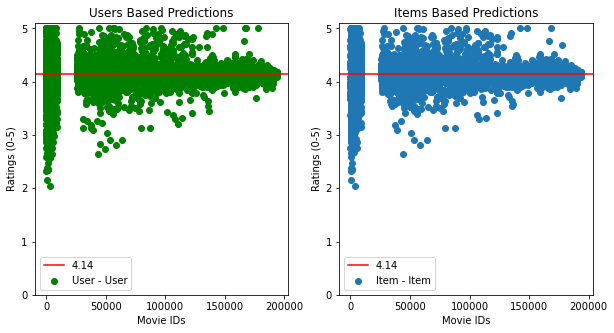

In [19]:
import matplotlib.pyplot as plt

user_user = hp.user_top_5(user_id = 1, model = knn_baseline, review_df = ratings, movies = movies)        ## The list of movies with the best model
item_item = hp.user_top_5(user_id = 1, model = knn_baseline_item, review_df = ratings, movies = movies)   ## The list of movies with the best model based off items
x_1 = [ID[0] for ID in user_user]   ## All movie id numbers predicted
x_2 = [ID[0] for ID in item_item]   ## All movie id numbers predicted from item based 
y_1 = [ID[1] for ID in user_user]   ## Movie Ratings from user based model
y_2 = [ID[1] for ID in item_item]   ## Movie Ratings from item based model

fig, ax = plt.subplots(ncols= 2, figsize = (10,5))

ax[0].set_title('Users Based Predictions')
ax[0].set_xlabel('Movie IDs')
ax[0].set_ylabel('Ratings (0-5)')
ax[0].set_ylim(0, 5.1)
ax[0].scatter(x_1, y_1, label = 'User - User', color = 'green');
ax[0].axhline(np.mean(y_2), color = 'red',label= round(np.mean(y_1), 2))
ax[0].legend();

ax[1].set_title('Items Based Predictions')
ax[1].set_ylim(0, 5.1)
ax[1].set_ylabel('Ratings (0-5)')
ax[1].set_xlabel('Movie IDs')
ax[1].scatter(x_2, y_2, label = 'Item - Item');
ax[1].axhline(np.mean(y_2), color = 'red', label= round(np.mean(y_2), 2))
ax[1].legend();

In [20]:
### Displays the distribution of ratings for the ratings dataset. 
ratings['rating'].loc[ratings['userId'] == 1].value_counts()

5.0    124
4.0     76
3.0     26
2.0      5
1.0      1
Name: rating, dtype: int64

In [21]:
### Print out the results from the models ###

print('Movies from User Filter')
for item in user_user[0:5]:
    print(movies['title'].loc[movies['movieId'] == item[0]].values)
print('Movies from Movie Filter')
for item in item_item[0:5]:
    print(movies['title'].loc[movies['movieId'] == item[0]].values)

Movies from User Filter
['Hoop Dreams (1994)']
['Three Colors: White (Trzy kolory: Bialy) (1994)']
['Shawshank Redemption, The (1994)']
['In the Name of the Father (1993)']
['Wallace & Gromit: The Best of Aardman Animation (1996)']
Movies from Movie Filter
['Hoop Dreams (1994)']
['Shawshank Redemption, The (1994)']
['In the Name of the Father (1993)']
['Wallace & Gromit: The Best of Aardman Animation (1996)']
['Ghost in the Shell (Kôkaku kidôtai) (1995)']


In [22]:
ids = [id[0] for id in sorted(user_user, key= lambda x:x[0])]    ## Take only the ID number from the list of tuples

rate_1 = np.array([user[1] for user in sorted(user_user, key= lambda x:x[0])])   ## Make numpy array for the first list
rate_2 = np.array([item[1] for item in sorted(item_item, key= lambda x:x[0])])   ## Make numpy array for second list

rate_comb = (rate_1 + rate_2)/2   ## Take the average of the two 
                   
rated_df = pd.DataFrame(zip(ids, rate_comb), columns= ['Movie_ID', 'Combined_Rating'])   ## Create a new dataframe with the new values     
hp.id_title(rated_df.sort_values('Combined_Rating', ascending= False)[0:5]['Movie_ID'].values, movies).values

array(['Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)',
       'Philadelphia Story, The (1940)', 'Casablanca (1942)',
       'Roman Holiday (1953)', 'Dirty Rotten Scoundrels (1988)'],
      dtype=object)

In [23]:
user_1_top_genres = hp.get_genres(ratings.loc[ratings['userId']==1].sort_values('rating', ascending = False)[0:5]['movieId'].values, movies)
pred_user_1 = hp.user_top_5(knn_baseline, ratings, 1, movies)
user_suggestions = hp.get_genres([ID[0] for ID in pred_user_1], movies)
movie_index = []
for index, suggestion in enumerate(user_suggestions):
    if suggestion in user_1_top_genres:
        movie_index.append(index - 1)
    if len(movie_index) == 5:
        break
top_movie_genre = [pred_user_1[value][0] for value in movie_index]
hp.id_title(top_movie_genre, movies)

596     Ghost in the Shell (Kôkaku kidôtai) (1995)
681                     Singin' in the Rain (1952)
711                               Notorious (1946)
8995                                Sicario (2015)
9162                         Big Short, The (2015)
Name: title, dtype: object

### Individual Results 
The **Top movies** for these methods are as followed for user 1:

| Weighted Ranks Sum | Average Ratings Movies | Includes Favorite Genres |
|:---:|:---:|:---:|
| **'Shawshank Redemption, The (1994)'** | **'Shawshank Redemption, The (1994)'** | **Ghost in the Shell (Kôkaku kidôtai) (1995)** |
| **'Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)'** | **'Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)'** | Singin' in the Rain (1952) |
| **'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)'** | **'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)'** | Notorious (1946) |
| **'Ghost in the Shell (Kôkaku kidôtai) (1995)'** | 'Lord of the Rings: The Fellowship of the Ring, The (2001)' | Sicario (2015) |
| 'Wallace & Gromit: The Best of Aardman Animation (1996)' | 'High Noon (1952)' | Big Short, The (2015) |

Some similar movies were suggested but there is no way to tell whether a user would like the recommendation that was created. <br> 
**The weighted ranked** recommendations consider all the movies and their respective ranking to give a **more diverse spread**. <br> 
**The average ratings** make sure that **only highly rated movies** are shown as a recommendation from the prediction ratings. <br> 
Using their **favorite genre** can filter out movies they wouldn't normally watch with ones that they are **familiar** with. 

## Cold Starts
There are **2 cold starts** scenarios when dealing with recommendation systems. <br>
If a **new user** is added to the system, how would **the system suggest recommendations**? There would be **no prior ratings** from the users and so there is no way to **compare them to the others** without more information. <br> 
If a **new movie** is added to the system, how would the system **suggest the movie to users**? The new movie won't be suggested since none of the other users have seen the movie as well. This would include all the movies in the movies list that didn't have a user rate the movie. One user a minimum needs to rate it in order for the model to recommend it. 

### User Case
For **new users,** we can recommend them the **highest-rated movie** or the most-rated movie to be recommended. We can also have the user give more information such as a know movie they watched and that rating or a given genre that the user likes. For this project, I can recommend the **most-rated movie** or the **most-reviewed movie.** Each has there advantage and disadvantages and have there uses if labeled properly on websites. 
The higher-rated movies can give users movies that will be liked but don't consider the number of users to that movie. <br> 
The **most rated movies** consider the fact that users have actively watched and rated them. This method is also **more likely** to change over time when more people rate the movies which can make for **better recommendations**. 

In [24]:
## Recommend the most rated movies without any distinguish ## 
hp.user_top_5(movies= movies, review_df= ratings)
## OR ## 

## Recommend the most reviewed movies from all of the avaiable users currently ## 
movies[movies['movieId'].isin(ratings[['movieId', 'userId']].groupby('movieId').count().sort_values('userId', ascending = False).index[0:5])]['title']

New User Detected. Average top rated movies are as followed


7656    Paper Birds (Pájaros de papel) (2010)
8107               Act of Killing, The (2012)
9083                          Jump In! (2007)
9094                             Human (2015)
9096                      L.A. Slasher (2015)
Name: title, dtype: object

257                  Pulp Fiction (1994)
277     Shawshank Redemption, The (1994)
314                  Forrest Gump (1994)
510     Silence of the Lambs, The (1991)
1939                  Matrix, The (1999)
Name: title, dtype: object

| Most Rated Movies | Most Popular Movies |
|---|---|
| Paper Birds (Pájaros de papel) (2010) | Pulp Fiction (1994) |
| Act of Killing, The (2012) | Shawshank Redemption, The (1994) |
| Jump In! (2007) | Forrest Gump (1994) |
| Human (2015) | Silence of the Lambs, The (1991) |
| L.A. Slasher (2015) | Matrix, The (1999) |

For a new movie, we need to implement the movie in the system and be able to recommend it to users. 
One potential solution was to give a rating to the movie, the average of that movie's genre. Although it gave a ranking to the movie, they would most likely won't get recommended since for this dataset at least, has to be at least rated 3 or above. 

We will use the movie dataset to help decide the rating for the movie and if it should be rated. To compare other movies, we used their genres to obtain an average rating.
Similarly to what other applications does are allow users to see recommendations for new items for users to look into along with the top choices as well. Keeping this method in mind, we can narrow it down further by letting the user's past movie genres limit the new movies to see whether or not to recommend them to the user or not. 
We can see that user 1's top-rated movies mainly have the genre, and action in them. That would mean that ideally, we would give more weight to a new action movie than any other movie

In [25]:
hp.new_movie('action', movies, ratings)

Genre Detected: action


2.935483870967742

In [33]:
movies.loc[movies['movieId'].isin(ratings.loc[ratings['userId'] == 1]['movieId'].values)]['genres'].value_counts()[0:5]

action|adventure|sci-fi      11
comedy                       11
action|adventure|thriller     8
action|drama|war              8
comedy|drama                  6
Name: genres, dtype: int64

## Conclusion 
Two models were created to help recommend the **best types of movies to a given user**. The **first** model is based off the **similarities of users** and the movies they like. The idea would be that a users have similar likes and dislike and should be recommended to them. They should rate the movies similairly. The second model compare the ratings from movies and compare them to similar rated movies. If the movies have similar ratings from one another, a user may rate that movie similar as well. Both of the models didn't perfrom well with a .8776 and .8899 RSME score. RSME score gives an average rating that the predicted values gave from the true value. That would mean that a movie was rated on average higher by **.87 to .89** more than the true values. In the attempt to see if **combining the models together**, there was a slight increase in predictions but not much. 

In order to better the model, some measure were placed when dealing with cold starts. **Cold starts** are sictuatuions to a given system that need some help to get started before being implemetned correctly. 
The **first** cold start to consider is a new user. Since there are **no prior ratings** from the user, there is no way to recommend movies with the current system. Two different solutions are to recommend the **most popular movies** or attempt to grab more information from the user to get a some sort of preference of a movie. 

The **second** cold start to consider is a new movie. A new movie will not have any users that have watched and rated the movie yet. Therefore, the system would never recommend the movie with the current system. To help remedy this, we implemented a content based filtering that help pick movies if the user have similar interest in the genre given to the new movie. Since we have a history of movie and their genres, we can still compare them for the users. 


## Limitations
This model isn't without its limitations as several aspects make the model less effective.

1. The distrubition is **skewed to the left** with many of the ratings are higher than 3 with **few rated between 0 - 2.5**. This can be contributed to the fact that many people won't leave reviews unprompted.
2. The model doesn't have anything to combat review bombing which has happened to many movies recently to **negatively impact the movie's performance**. This can be difficult since it's hard to distinguish between actually truthful ratings or not. 
3. There were **many ratings from the same users**. There can be a **bias** between users especially when the majority of the ratings are from them. These users could also be critics that may be very helpful to the average moviegoer. 

## Recommendations
There are also some ways to improve the model that can be added to the project to further the accuracy for users.

1. The movie dataset had genres as a column. A previous project shows that **certain combinations perform better at the box office**. If we can incorporate this in the model and know what the users' favorite genres are. 
2. **More data will improve the model**. There was a bigger dataset that was also created and could be used, with enough time, for a better model. 
3. The data should include more ratings with a **wider range of ratings** from the users. Ideally should be a bell curve depending on if an equal number of bad and good movies are included in the movies list. 